In [39]:
# Dependencies and Setup
# SqlAlchemy
from sqlalchemy import create_engine

#For Pandas
import pandas as pd

#for matplotlib & for numpy
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create an engine & Pass to postgres and to connect to the database
engine = create_engine('postgres://postgresql://localhost:5432/Homework_db')
conn = engine.connect()

In [17]:
# query all records from the salaries table
Salaries_data = pd.read_sql("SELECT * From Salaries", conn)
Salaries_data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [18]:
# query all records from the titles table
Titles_data = pd.read_sql("SELECT * From Titles", conn)
Titles_data.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [24]:
#combine data
combined_data = pd.merge(Salaries_data,Titles_data, on='emp_no', how='inner')
combined_data.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [33]:
#Group by title
titleGrp_df = combined_data.groupby('title').mean()
titleGrp_df

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


In [36]:
#drop Emp_no and get Salary and Title
RtitleGrp_df = titleGrp_df.drop(columns = 'emp_no')
RtitleGrp_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


In [37]:
#reset index
RtitleGrp_df = RtitleGrp_df.reset_index()
RtitleGrp_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


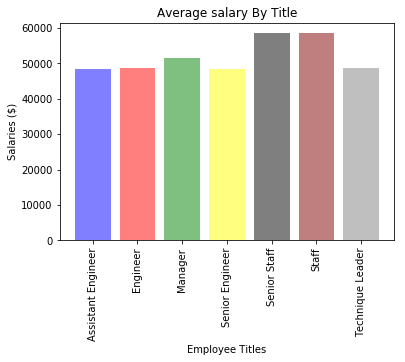

In [42]:
# Create Bar chart for average salary by title
#set x axis, y axis and tick location
x_axis = RtitleGrp_df["title"]
ticks= np.arange(len(x_axis))
y_axis = RtitleGrp_df["salary"]

plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=['Blue', 'red', 'green','yellow', 'black', 'maroon','grey'])

#ticks for bar char's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

#set for the labels & titles
plt.title("Average salary By Title")
plt.xlabel("Employee Titles")
plt.ylabel("Salaries ($)")

#save figure
plt.savefig("avg_sal_by_title.png")

#show plt
plt.show()